In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

Для курсовой работы Андрея Кривоносова мы решили спарсить данные с ebay: продаваемые там телефоны, их марки и характеристики. На основне этих данныех Андрей далее будет определять изменение в истинном спросе потребителей на товар после ажиотажа перед началом продаж. 

Сначала мы спарсили ссылки на страницы, а потом заставили компьютер пройтись по всем ссылкам, вытащить названия телефонов и ссылки на их характеристики, а потом добавить эти характеристики к до этого полученной информации. Далее мы решили привести данные в адекватный вид: обработали названия, выделили марки в отдельную колонку. 

Потом мы составили несколько гистограммок, на которых показали разные взаимосвязи наших данных. Продолжение работы вы можете увидеть далее:

In [2]:
# гистограмма (марка телефона, количесво в выбоорке)
# гистограмма (цена, количество телефонов)
# гистограмма (марка, сумма продаж)
# гистограмма (марка, средняя цена)

# описание статистики, цель исследования, гипотеза - перед запуском продумкта на рынок создается чрезсреный ажиотаж, за счет которого реальная стоимость товара переоценивается потребителями
# полученные данные необходимы для понимания спроса на товары после их запуска

_____

Предобработка:

In [4]:
df_items = pd.read_csv('https://raw.githubusercontent.com/AleksKids/hedonistic-demand-from-ebay/main/Data%20Tables/Global/Sales.tsv', delimiter = "\t")

In [5]:
df_items.dropna(subset=['Link'], inplace=True)
df_items.reset_index(inplace=True)
df_items.drop('index', axis=1, inplace = True)
df_items.isna().sum()

Title            0
Price            0
Shipping_cost    0
Sales_Count      0
Sales_Value      0
Link             0
dtype: int64

In [6]:
df_items

,Title,Price,Shipping_cost,Sales_Count,Sales_Value,Link
0,Apple iPhone 11 64GB Factory Unlocked 4G LTE S...,$337.59,$0.00,"19,787","$6,679,958.00",https://www.ebay.com/itm/254604777645?nordt=tr...
1,Apple iPhone XR 64GB Factory Unlocked Smartpho...,$266.28,$0.00,"12,440","$3,312,560.60",https://www.ebay.com/itm/254187678666?nordt=tr...
2,Apple iPhone 11 64GB Unlocked Smartphone - Ver...,$359.11,$16.93,"12,224","$4,389,742.37",https://www.ebay.com/itm/363183815277?nordt=tr...
3,Apple iPhone X 64GB Factory Unlocked Phone - V...,$231.98,$16.50,"11,781","$2,732,899.88",https://www.ebay.com/itm/382605209867?nordt=tr...
4,Apple iPhone X 256GB Unlocked Smartphone - Ver...,$263.59,$15.34,"10,020","$2,641,203.85",https://www.ebay.com/itm/382446518910?nordt=tr...
...,...,...,...,...,...,...
2919,Samsung Galaxy Note8 SM-N950U - 64GB (Unlocked...,$128.40,$0.00,37,"$4,750.91",https://www.ebay.com/itm/265635248944?nordt=tr...
2920,Brand New STALA509DCP TCL A3 32GB Storage 3GB ...,$43.13,$0.00,34,"$1,466.36",https://www.ebay.com/itm/265731617536?nordt=tr...
2921,Apple iPhone 12 Pro Max - 128GB - Fully Unlock...,$554.31,$0.00,37,"$20,509.63",https://www.ebay.com/itm/265936106963?nordt=tr...
2922,Apple iPhone 13 Mini 128GB - T-Mobile / Metro ...,$380.90,$0.00,33,"$12,569.67",https://www.ebay.com/itm/266138817726?nordt=tr...


In [7]:
import re

def Sales_Value(value):
  pattern = r'\$|,'
  clean_value = re.sub(pattern, '', value)
  numeric_value = float(clean_value)
  return numeric_value


df_items.Price = df_items.Price.apply(lambda x: float(re.sub(r'[^\d.]', '', x)))
df_items.Shipping_cost = df_items.Shipping_cost.apply(lambda x: float(re.sub(r'[^\d.]', '', x)))
df_items.Sales_Count = df_items.Sales_Count.apply(lambda x: float(re.sub(",", "", x))) 
df_items.Sales_Value = df_items.Sales_Value.apply(lambda x: Sales_Value(x))

In [8]:
df_items

,Title,Price,Shipping_cost,Sales_Count,Sales_Value,Link
0,Apple iPhone 11 64GB Factory Unlocked 4G LTE S...,337.59,0.00,19787.0,6679958.00,https://www.ebay.com/itm/254604777645?nordt=tr...
1,Apple iPhone XR 64GB Factory Unlocked Smartpho...,266.28,0.00,12440.0,3312560.60,https://www.ebay.com/itm/254187678666?nordt=tr...
2,Apple iPhone 11 64GB Unlocked Smartphone - Ver...,359.11,16.93,12224.0,4389742.37,https://www.ebay.com/itm/363183815277?nordt=tr...
3,Apple iPhone X 64GB Factory Unlocked Phone - V...,231.98,16.50,11781.0,2732899.88,https://www.ebay.com/itm/382605209867?nordt=tr...
4,Apple iPhone X 256GB Unlocked Smartphone - Ver...,263.59,15.34,10020.0,2641203.85,https://www.ebay.com/itm/382446518910?nordt=tr...
...,...,...,...,...,...,...
2919,Samsung Galaxy Note8 SM-N950U - 64GB (Unlocked...,128.40,0.00,37.0,4750.91,https://www.ebay.com/itm/265635248944?nordt=tr...
2920,Brand New STALA509DCP TCL A3 32GB Storage 3GB ...,43.13,0.00,34.0,1466.36,https://www.ebay.com/itm/265731617536?nordt=tr...
2921,Apple iPhone 12 Pro Max - 128GB - Fully Unlock...,554.31,0.00,37.0,20509.63,https://www.ebay.com/itm/265936106963?nordt=tr...
2922,Apple iPhone 13 Mini 128GB - T-Mobile / Metro ...,380.90,0.00,33.0,12569.67,https://www.ebay.com/itm/266138817726?nordt=tr...


In [9]:
brands_list = ['Apple', 'Samsung', 'Huawei', 'Xiaomi', 'Oppo', 'OnePlus', 'Google', 'Motorola', 'Sony', 'LG', 'HTC', 'Nokia', 'BlackBerry', 'Lenovo', 'Asus', 'ZTE', 'Alcatel', 'Vivo', 'Realme', 'Honor']
brands_regex = re.compile('('+ '|'.join(brands_list) + ')', flags=re.IGNORECASE)

df_items['brand'] = df_items['Title'].str.extract(brands_regex)
df_items['brand'] = df_items['brand'].apply(lambda x: x.lower() if type(x) == str else x)
df_items

,Title,Price,Shipping_cost,Sales_Count,Sales_Value,Link,brand
0,Apple iPhone 11 64GB Factory Unlocked 4G LTE S...,337.59,0.00,19787.0,6679958.00,https://www.ebay.com/itm/254604777645?nordt=tr...,apple
1,Apple iPhone XR 64GB Factory Unlocked Smartpho...,266.28,0.00,12440.0,3312560.60,https://www.ebay.com/itm/254187678666?nordt=tr...,apple
2,Apple iPhone 11 64GB Unlocked Smartphone - Ver...,359.11,16.93,12224.0,4389742.37,https://www.ebay.com/itm/363183815277?nordt=tr...,apple
3,Apple iPhone X 64GB Factory Unlocked Phone - V...,231.98,16.50,11781.0,2732899.88,https://www.ebay.com/itm/382605209867?nordt=tr...,apple
4,Apple iPhone X 256GB Unlocked Smartphone - Ver...,263.59,15.34,10020.0,2641203.85,https://www.ebay.com/itm/382446518910?nordt=tr...,apple
...,...,...,...,...,...,...,...
2919,Samsung Galaxy Note8 SM-N950U - 64GB (Unlocked...,128.40,0.00,37.0,4750.91,https://www.ebay.com/itm/265635248944?nordt=tr...,samsung
2920,Brand New STALA509DCP TCL A3 32GB Storage 3GB ...,43.13,0.00,34.0,1466.36,https://www.ebay.com/itm/265731617536?nordt=tr...,NaN
2921,Apple iPhone 12 Pro Max - 128GB - Fully Unlock...,554.31,0.00,37.0,20509.63,https://www.ebay.com/itm/265936106963?nordt=tr...,apple
2922,Apple iPhone 13 Mini 128GB - T-Mobile / Metro ...,380.90,0.00,33.0,12569.67,https://www.ebay.com/itm/266138817726?nordt=tr...,apple


____

Предварительный анализ:

In [ ]:
df_items.describe()

,Price,Shipping_cost,Sales_Count,Sales_Value
count,2924.000000,2924.000000,2924.000000,2.924000e+03
mean,219.440198,9.679042,276.165869,5.979867e+04
std,183.007080,10.442718,816.869807,2.259736e+05
min,5.150000,0.000000,33.000000,2.678200e+02
25%,93.510000,0.000000,57.000000,8.240230e+03
50%,159.875000,9.245000,97.500000,1.737587e+04
75%,287.565000,14.990000,216.250000,4.303439e+04
max,1493.390000,111.670000,19787.000000,6.679958e+06


In [ ]:
df_items.corr()

<ipython-input-21-05b9cc63d60f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_items.corr()


,Price,Shipping_cost,Sales_Count,Sales_Value
Price,1.000000,0.036724,-0.005375,0.140800
Shipping_cost,0.036724,1.000000,0.031657,0.022001
Sales_Count,-0.005375,0.031657,1.000000,0.925535
Sales_Value,0.140800,0.022001,0.925535,1.000000


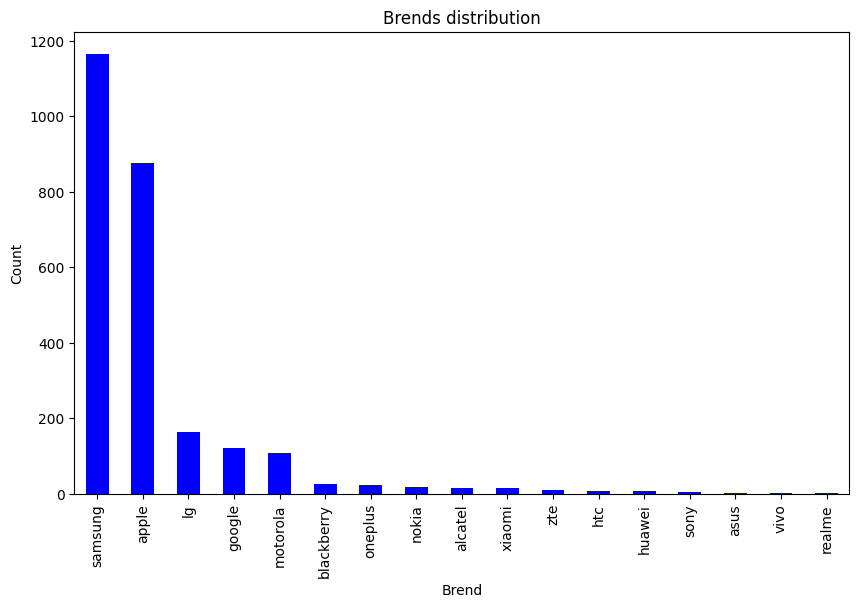

In [ ]:
# Гистограмма распределения брендов
brands = df_items.brand.value_counts()
plt.figure(figsize=(10,6))
brands.plot(kind='bar', color='b')
plt.title('Brends distribution')
plt.xlabel('Brend')
plt.ylabel('Count')
plt.show()

Как мы видим с спарсенных данных самыми популярными марками являются Samsung и Apple, во вторую по популярности можно объеденить группу LG, Google и Motorola, остальные бренды не так распространены по количеству продаж. 

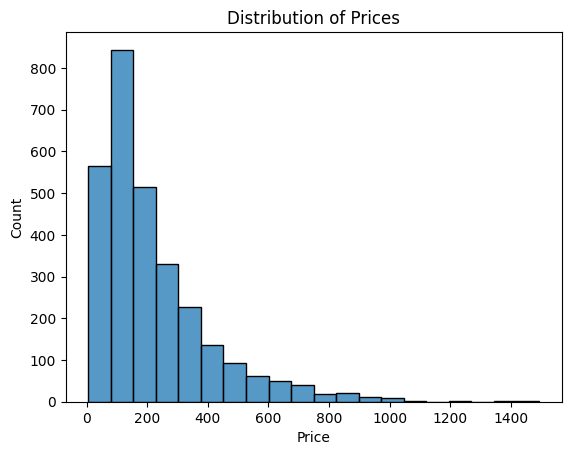

In [ ]:
# Гистограмма распределения цен
sns.histplot(df_items['Price'], bins=20)
plt.title('Distribution of Prices')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

Распределение цен марок телефонов похоже на нормальное и имеет моду около 100 долларов. 

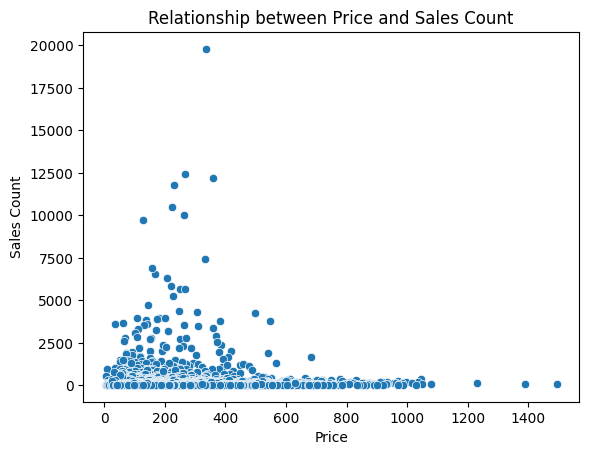

In [ ]:
# Диаграмма рассеяния количества продаж и стоимости товаров
sns.scatterplot(x='Price', y='Sales_Count', data=df_items)
plt.title('Relationship between Price and Sales Count')
plt.xlabel('Price')
plt.ylabel('Sales Count')
plt.show()

Тут мы решили посмотреть на взаимосвязь между ценой и количеством продаж. Ожидаемо, что наибольшие продажи видны у смартфонов среднего сегмента, средней ценовой категории. Дорогие модели продаются в гораздо меньших объемах

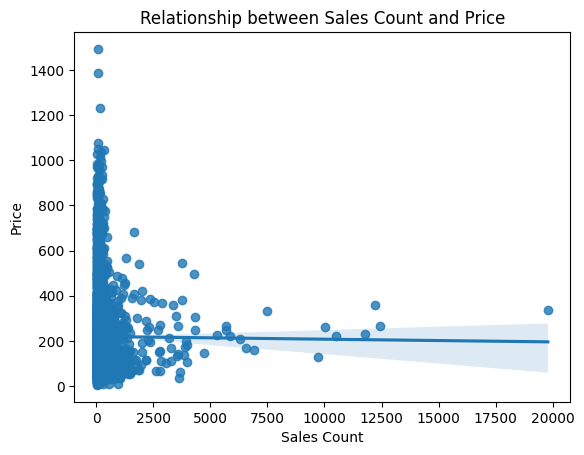

In [ ]:
# График зависимости стоимости товара от его количества продаж
sns.regplot(x='Sales_Count', y='Price', data=df_items)
plt.title('Relationship between Sales Count and Price')
plt.xlabel('Sales Count')
plt.ylabel('Price')
plt.show()

График идентичен предыдущему, так как идейно повторяет его смысл. Однако выполнение задания разными способами иногда позволяет посмотреть на задачу под новым углом и прийти к гениальным выводам.

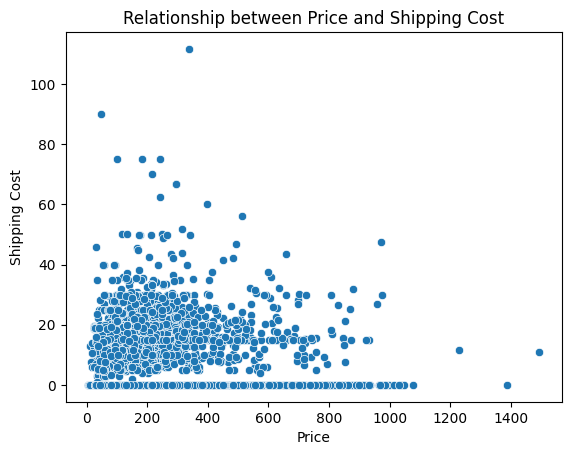

In [ ]:
# Диаграмма рассеяния между стоимостью товара и стоимостью доставки
sns.scatterplot(x='Price', y='Shipping_cost', data=df_items)
plt.title('Relationship between Price and Shipping Cost')
plt.xlabel('Price')
plt.ylabel('Shipping Cost')
plt.show()

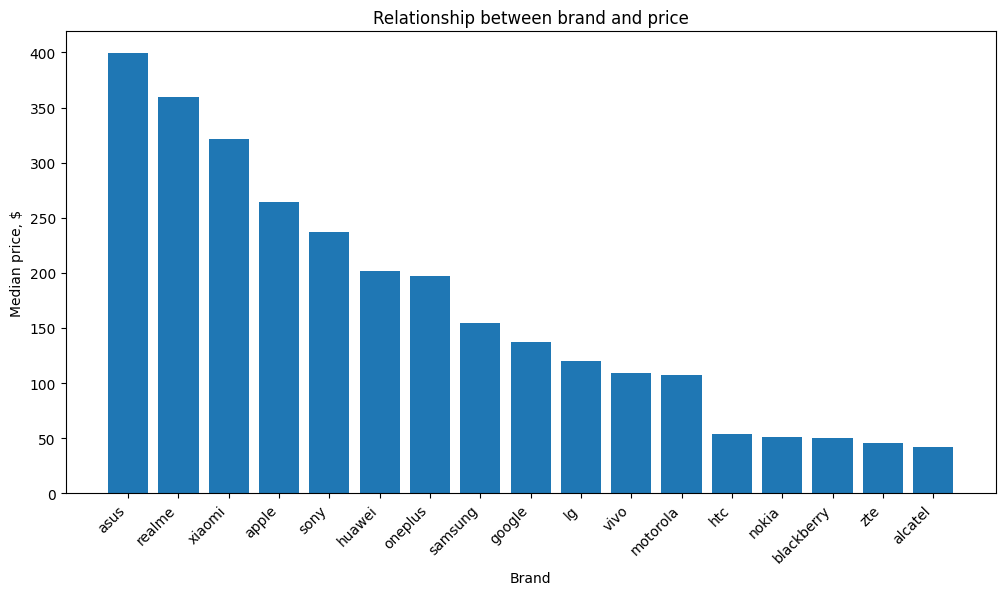

In [ ]:
# Диаграмма распределения брендов и  средних цен
brand_prices = df_items.groupby('brand').agg({'Price': 'median'}).sort_values(by='Price', ascending=False)

fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(brand_prices.index, brand_prices['Price'])

ax.set_xlabel('Brand')
ax.set_ylabel('Median price, $')
ax.set_title('Relationship between brand and price')

plt.xticks(rotation=45, ha='right')

plt.show()

____

In [52]:
characteristics_df = pd.read_csv("https://raw.githubusercontent.com/AleksKids/hedonistic-demand-from-ebay/main/Data%20Tables/Global/Characteristics.tsv", delimiter = "\t")

<ipython-input-52-35c7587dbe32>:1: DtypeWarning: Columns (27,28,32,35,36,39,45,46,55,56,59,65,68,69,70,74,77,78,89,95,99,101,106,107,113,116,122,134,138,139,140,146,152,153,154,156,159,162,163,166,167,168,171,173,175,176,180,181,182,187,188,189,190,192,193,194,198,199,201,202,206,208,209,210,211,212,213,214,215,216,217,218,219,221,222,223,226,229,233,235,236,238,240,241,244,245,246,247,248,251,252,254,257,259,261,265,266,267,272,273,274,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,307,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,345,346,347,348,349,350,351,352) have mixed types. Specify dtype option on import or set low_memory=False.
  characteristics_df = pd.read_csv("characteristics_df.tsv", delimiter = "\t")


In [53]:
cols = list(characteristics_df.count()[(characteristics_df.count()>(1000))].index)
cols

['Link',
 'Condition',
 'Seller Notes',
 'Brand',
 'Model',
 'Storage Capacity',
 'Network',
 'Camera Resolution',
 'Screen Size',
 'Lock Status',
 'RAM',
 'Contract',
 'Operating System',
 'Model Number',
 'Style',
 'MPN',
 'Connectivity',
 'Features',
 'SIM Card Slot',
 'Memory Card Type',
 'Processor',
 'Color']

In [54]:
characteristics_df = characteristics_df[cols]

In [55]:
characteristics_df.isna().sum().sort_values()

Link                    0
Condition               0
Brand                  20
Model                 166
Operating System      380
Storage Capacity      425
Network               508
Camera Resolution     511
Screen Size           511
MPN                   685
Processor             697
Connectivity          721
Lock Status           724
RAM                   726
Contract              758
Features              827
Seller Notes          853
Style                 956
SIM Card Slot         991
Model Number         1058
Memory Card Type     1397
Color                1787
dtype: int64

In [56]:
merged_df = df_items.merge(characteristics_df, on='Link', how='inner')

In [57]:
merged_df["Brand"][merged_df["Brand"].isna()] = merged_df["brand"].apply(lambda x: x.title() if type(x)==str else x)

<ipython-input-57-8f6b08965f76>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df["Brand"][merged_df["Brand"].isna()] = merged_df["brand"].apply(lambda x: x.title() if type(x)==str else x)


In [64]:
(~merged_df.isna()).sum()

Title                3081
Price                3081
Shipping_cost        3081
Sales_Count          3081
Sales_Value          3081
Link                 3081
Condition            3081
Seller Notes         2200
Brand                3073
Model                2911
Storage Capacity     2630
Network              2541
Camera Resolution    2560
Screen Size          2556
Lock Status          2325
RAM                  2335
Contract             2289
Operating System     2689
Model Number         1961
Style                2067
MPN                  2356
Connectivity         2330
Features             2216
SIM Card Slot        2044
Memory Card Type     1612
Processor            2358
Color                1204
dtype: int64

In [58]:
merged_df.iloc[182]

Title                Motorola Moto G Stylus 5G XT2131-3 GSM Unlocke...
Price                                                           199.56
Shipping_cost                                                    10.39
Sales_Count                                                      673.0
Sales_Value                                                  134304.65
Link                 https://www.ebay.com/itm/203747687712?nordt=tr...
brand                                                         motorola
Condition                                                     Open box
Seller Notes         “Unlocked and compatible with any GSM Carrier ...
Brand                                                         Motorola
Model                                                      G stylus 5G
Storage Capacity                                                128 GB
Network                                                  AT&T Unlocked
Camera Resolution                                              48.0 MP
Screen

In [60]:
merged_df.drop('brand', axis=1, inplace = True)

In [61]:
merged_df.to_csv("great_bd.tsv", sep="\t")

In [63]:
merged_df.shape

(3081, 27)